In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import openpyxl as op
from sqlalchemy import create_engine
from IPython.display import display

data = '/Users/alejandrogomez-paz/Documents/df.csv'
df = pd.read_csv(data)

data_clean = '/Users/alejandrogomez-paz/Documents/df_clean.csv'
df_clean = pd.read_csv(data_clean)

Exploratory Data Analysis by Country

95.84398300628283


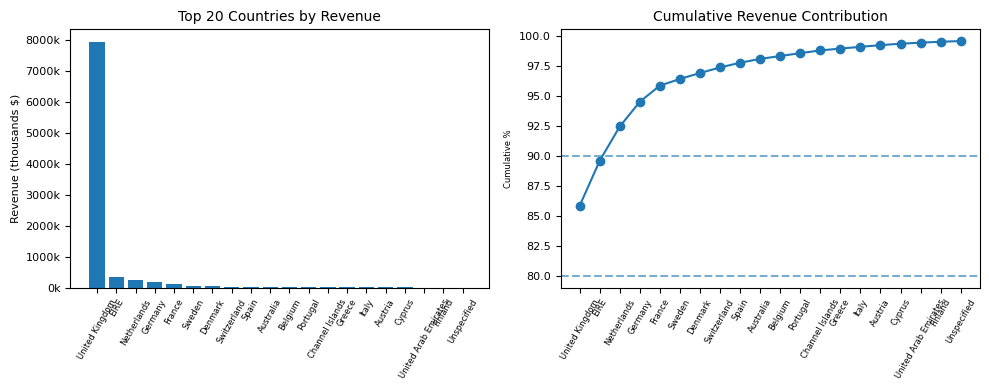

In [18]:
EDA_Country = pd.DataFrame()

EDA_Country["Country_Revenue"] = df.groupby("Country")["Revenue"].sum().sort_values(ascending = False).head(20)
EDA_Country["Total_Revenue"] = df["Revenue"].sum()
EDA_Country["Pct_of_Revenue"] = EDA_Country["Country_Revenue"] * 100/ EDA_Country["Total_Revenue"]


print(sum(EDA_Country["Pct_of_Revenue"].head(5))) # What percent of total revenue is driven by the five highest-revenue countries
EDA_Country.head(5) # UK drives 86% of Revenue, and the top five drive almost 96% of Revenue


def thousands_formatter(x, pos):
    return f'{x/1000:.0f}k'

EDA_Country["Cumulative_Pct"] = EDA_Country["Pct_of_Revenue"].cumsum()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # compact side-by-side

axes[0].bar(
    EDA_Country.index,
    EDA_Country["Country_Revenue"]
)
axes[0].set_title("Top 20 Countries by Revenue", fontsize=10)
axes[0].set_ylabel("Revenue (thousands $)", fontsize=8)
axes[0].tick_params(axis="x", rotation=60, labelsize=6)
axes[0].tick_params(axis="y", labelsize=8)
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # format y-axis

axes[1].plot(
    EDA_Country.index,
    EDA_Country["Cumulative_Pct"],
    marker="o"
)
axes[1].axhline(80, linestyle="--", alpha=0.6)
axes[1].axhline(90, linestyle="--", alpha=0.6)
axes[1].set_title("Cumulative Revenue Contribution", fontsize=10)
axes[1].set_ylabel("Cumulative %", fontsize=6)
axes[1].tick_params(axis="x", rotation=60, labelsize=6)
axes[1].tick_params(axis="y", labelsize=8)

plt.tight_layout()
plt.show()

EDA_Country.to_csv("/Users/alejandrogomez-paz/Documents/EDA_Country.csv", index=False)


Exploratory Data Analysis over Time

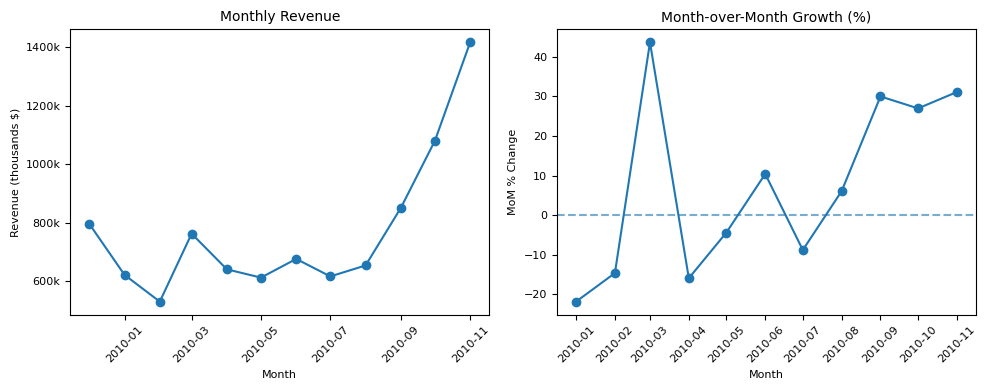

In [19]:
EDA_time = pd.DataFrame()

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

df["Month"] = df["InvoiceDate"].dt.to_period("M")

EDA_time = df.groupby("Month", as_index = False).agg(Revenue=("Revenue", "sum"))

EDA_time["MoM_growth"] = EDA_time["Revenue"].pct_change() * 100

EDA_time = EDA_time.sort_values("Month")

EDA_time["Month_ts"] = EDA_time["Month"].dt.to_timestamp()

def thousands_formatter(x, pos):
    return f'{x/1000:.0f}k'  # e.g., 123456 -> 123k

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # smaller figure

# ---- Left: Monthly Revenue
axes[0].plot(
    EDA_time["Month_ts"],
    EDA_time["Revenue"],
    marker="o"
)
axes[0].set_title("Monthly Revenue", fontsize=10)
axes[0].set_ylabel("Revenue (thousands $)", fontsize=8)
axes[0].set_xlabel("Month", fontsize=8)
axes[0].tick_params(axis="x", rotation=45, labelsize=8)
axes[0].tick_params(axis="y", labelsize=8)
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # format y-axis

# ---- Right: MoM % Change
axes[1].plot(
    EDA_time["Month_ts"],
    EDA_time["MoM_growth"],
    marker="o"
)
axes[1].axhline(0, linestyle="--", alpha=0.6)
axes[1].set_title("Month-over-Month Growth (%)", fontsize=10)
axes[1].set_ylabel("MoM % Change", fontsize=8)
axes[1].set_xlabel("Month", fontsize=8)
axes[1].tick_params(axis="x", rotation=45, labelsize=8)
axes[1].tick_params(axis="y", labelsize=8)

plt.tight_layout()
plt.show()